# **Customer Data Analytics Pipeline**


READING DATA FILES
Customer data (from CSV):
   customer_id              name             email   age           city  \
0            1      Maria Santos   maria@email.com  25.0         Manila   
1            2  Juan Dela Cruz      juan@email.com   NaN  Quezon City     
2            3         Ana Reyes     ana@email.com  35.0         Makati   
3            4     Carlos Garcia  carlos@email.com  28.0         Manila   
4            5   Sofia Hernandez   sofia@email.com  32.0    Taguig City   

  registration_date  
0        2025-01-15  
1        2025-02-20  
2        2025-03-10  
3        2025-04-05  
4        2025-05-12  
Shape: (13, 6)

----------------------------------------
Sales data (from Excel):
   sale_id  customer_id product_name  monthly_sales  quantity   sale_date
0        1            1       Laptop        1200.50         1  2025-01-20
1        2            2      Mouse              NaN         2  2025-02-25
2        3            3     Keyboard         850.75         1  2025

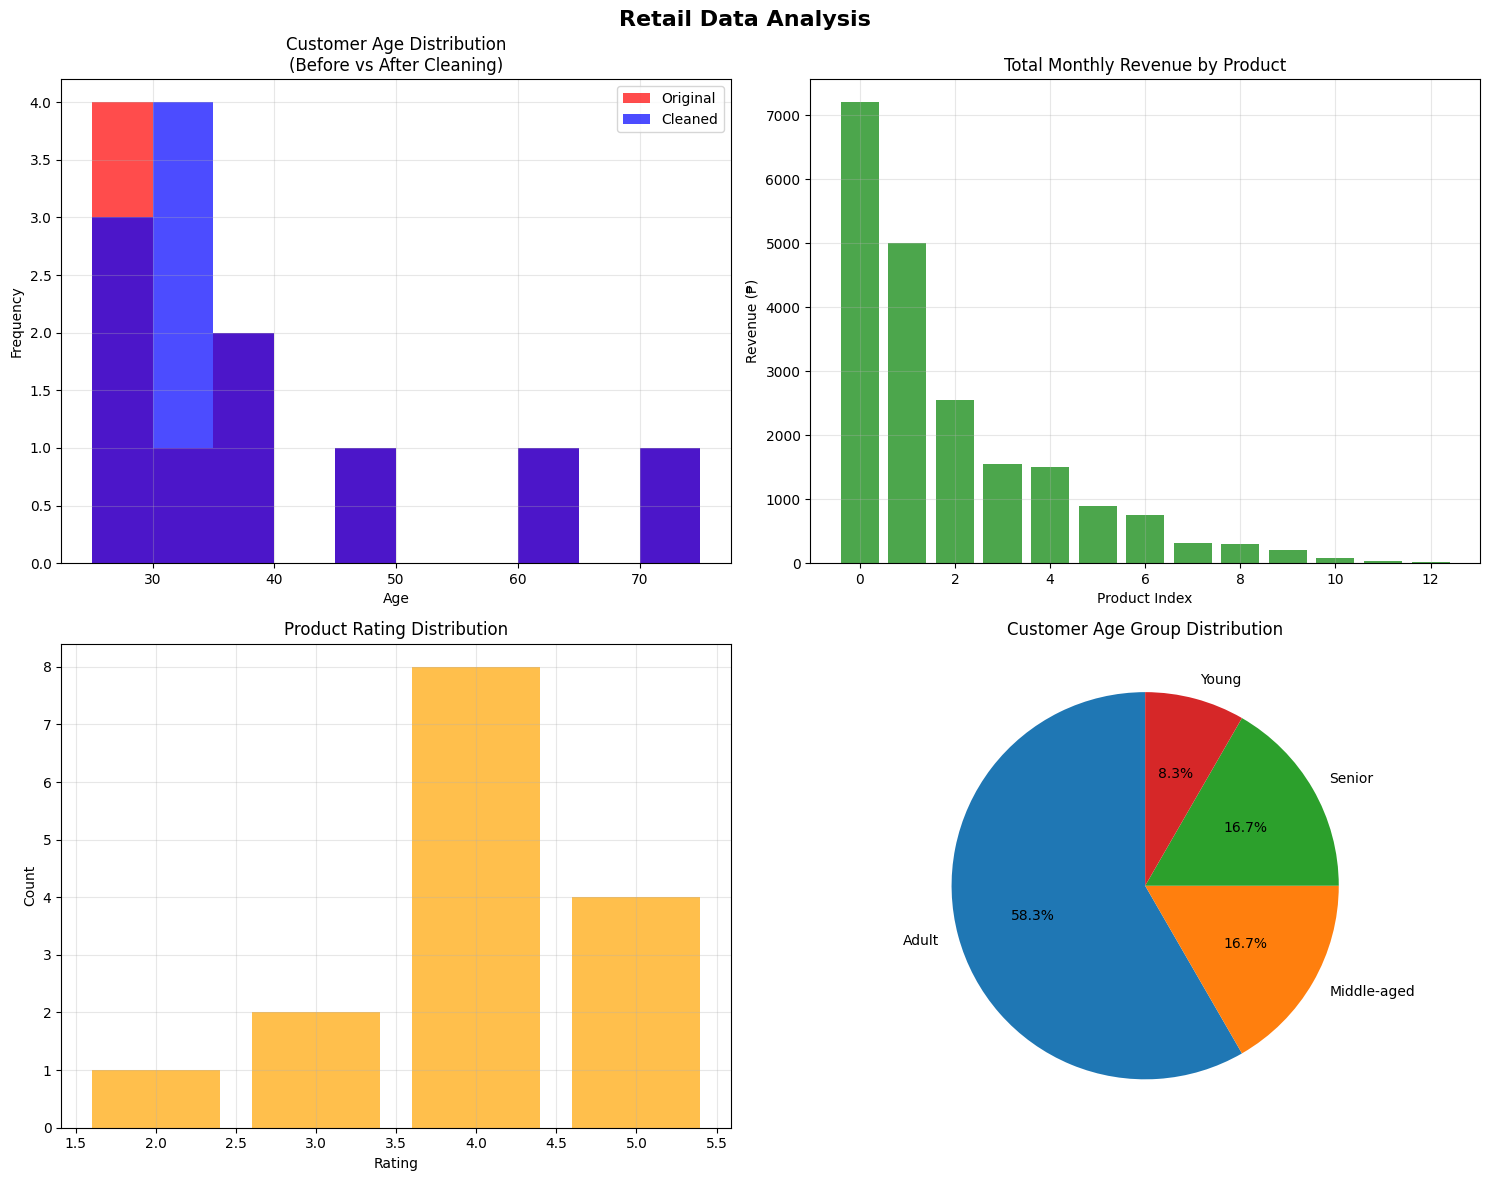

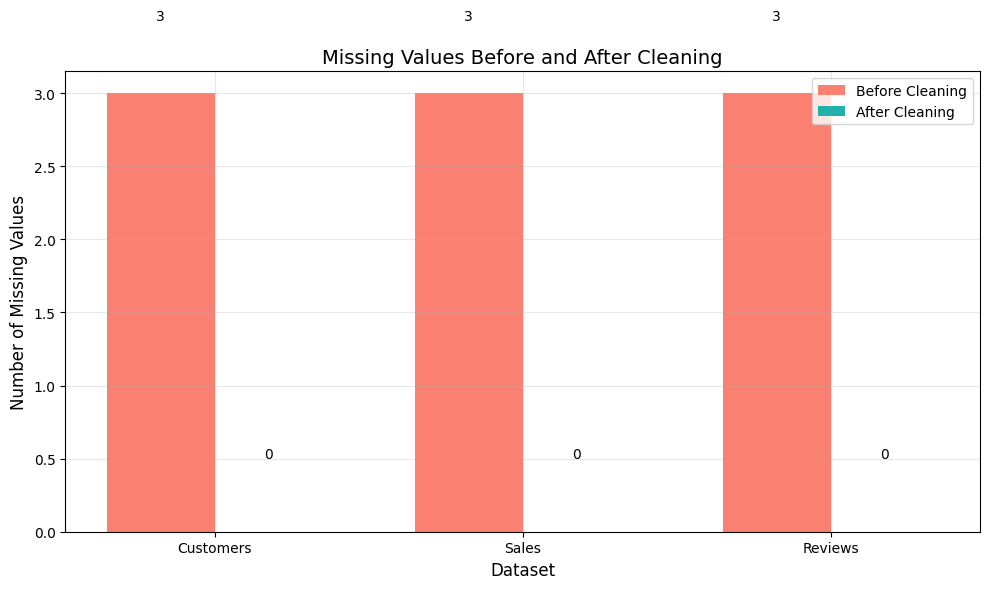


----------------------------------------
SUMMARY STATISTICS:
----------------------------------------
Total customers: 12
Total sales records: 20
Total reviews: 15
Average customer age: 39.2 years
Total revenue: ₱15,192.72
Average rating: 4.0/5

----------------------------------------
CUSTOMER DISTRIBUTION BY CITIES:
----------------------------------------
- Manila: 3 customers
- Quezon City: 2 customers
- Makati: 2 customers
- Taguig City: 2 customers
- Caloocan City: 2 customers
- Pasig City: 1 customers

----------------------------------------
DATA QUALITY IMPROVEMENT REPORT:
----------------------------------------
BEFORE CLEANING:
- Customer missing values: 3
- Sales missing values: 3
- Reviews missing values: 3
- Customer duplicates: 1

AFTER CLEANING:
- Customer missing values: 0
- Sales missing values: 0
- Reviews missing values: 0
- Customer duplicates: 0

DATA CLEANING AND TRANSFORMATION COMPLETED SUCCESSFULLY!


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# READ EXISTING DATA FILES
print("\n" + "="*60)
print("READING DATA FILES")
print("="*60)

# Read CSV file
try:
    df_customers_read = pd.read_csv('customer_info.csv')
    print("Customer data (from CSV):")
    print(df_customers_read.head())
    print(f"Shape: {df_customers_read.shape}")
except FileNotFoundError:
    print("Error: customer_info.csv file not found")
    df_customers_read = pd.DataFrame()

print("\n" + "-"*40)

# Read Excel file
try:
    df_sales_read = pd.read_excel('sales_data.xlsx')
    print("Sales data (from Excel):")
    print(df_sales_read.head())
    print(f"Shape: {df_sales_read.shape}")
except FileNotFoundError:
    print("Error: sales_data.xlsx file not found")
    df_sales_read = pd.DataFrame()

print("\n" + "-"*40)

# Read JSON file
try:
    df_reviews_read = pd.read_json('reviews_data.json', lines=True)
    print("Reviews data (from JSON):")
    print(df_reviews_read.head())
    print(f"Shape: {df_reviews_read.shape}")
except FileNotFoundError:
    print("Error: reviews_data.json file not found")
    df_reviews_read = pd.DataFrame()

# Check if all files were loaded successfully
if df_customers_read.empty or df_sales_read.empty or df_reviews_read.empty:
    print("\nERROR: One or more data files could not be loaded. Please ensure all files exist.")
    exit()

# DATA CLEANING
print("\n" + "="*60)
print("DATA CLEANING")
print("="*60)

# Clean Customer Data
print("CLEANING CUSTOMER DATA:")
print("Before cleaning:")
print(f"Missing values:\n{df_customers_read.isnull().sum()}")
print(f"Duplicates: {df_customers_read.duplicated().sum()}")

# Create cleaned version
df_customers_clean = df_customers_read.copy()

# Handle missing values
df_customers_clean['age'].fillna(df_customers_clean['age'].median(), inplace=True)

# Trim string fields
df_customers_clean['name'] = df_customers_clean['name'].str.strip()
df_customers_clean['city'] = df_customers_clean['city'].str.strip()

# Remove duplicates
df_customers_clean.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)

print("\nAfter cleaning:")
print(f"Missing values:\n{df_customers_clean.isnull().sum()}")
print(f"Duplicates: {df_customers_clean.duplicated().sum()}")
print(f"Shape changed from {df_customers_read.shape} to {df_customers_clean.shape}")

print("\n" + "-"*40)

# Clean Sales Data
print("CLEANING SALES DATA:")
print("Before cleaning:")
print(f"Missing values:\n{df_sales_read.isnull().sum()}")

df_sales_clean = df_sales_read.copy()

# Handle missing values
df_sales_clean['monthly_sales'].fillna(df_sales_clean['monthly_sales'].median(), inplace=True)

# Trim string fields
df_sales_clean['product_name'] = df_sales_clean['product_name'].str.strip()

print("\nAfter cleaning:")
print(f"Missing values:\n{df_sales_clean.isnull().sum()}")

print("\n" + "-"*40)

# Clean Reviews Data
print("CLEANING REVIEWS DATA:")
print("Before cleaning:")
print(f"Missing values:\n{df_reviews_read.isnull().sum()}")

df_reviews_clean = df_reviews_read.copy()

# Handle missing values
df_reviews_clean['rating'].fillna(df_reviews_clean['rating'].median(), inplace=True)

# Trim string fields
df_reviews_clean['product_name'] = df_reviews_clean['product_name'].str.strip()
df_reviews_clean['review_text'] = df_reviews_clean['review_text'].str.strip()

print("\nAfter cleaning:")
print(f"Missing values:\n{df_reviews_clean.isnull().sum()}")

# DATA TRANSFORMATION
print("\n" + "="*60)
print("DATA TRANSFORMATION")
print("="*60)

# Transform Customer Data
df_customers_transformed = df_customers_clean.copy()

# Rename columns
df_customers_transformed.rename(columns={
    'name': 'customer_name',
    'age': 'customer_age',
    'city': 'customer_city'
}, inplace=True)

# Convert data types and create new columns
df_customers_transformed['customer_age'] = df_customers_transformed['customer_age'].astype(int)
df_customers_transformed['age_group'] = pd.cut(df_customers_transformed['customer_age'],
                                              bins=[0, 25, 35, 50, 100],
                                              labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Convert registration date to datetime
df_customers_transformed['registration_date'] = pd.to_datetime(df_customers_transformed['registration_date'])
df_customers_transformed['days_since_registration'] = (datetime.now() - df_customers_transformed['registration_date']).dt.days

print("Customer data transformation completed:")
print(df_customers_transformed.head())

print("\n" + "-"*40)

# Transform Sales Data
df_sales_transformed = df_sales_clean.copy()

# Rename columns
df_sales_transformed.rename(columns={
    'monthly_sales': 'monthly_revenue',
    'product_name': 'product'
}, inplace=True)

# Create new metrics
df_sales_transformed['yearly_revenue'] = df_sales_transformed['monthly_revenue'] * 12
df_sales_transformed['revenue_per_unit'] = df_sales_transformed['monthly_revenue'] / df_sales_transformed['quantity']

# Convert sale date to datetime
df_sales_transformed['sale_date'] = pd.to_datetime(df_sales_transformed['sale_date'])
df_sales_transformed['sale_month'] = df_sales_transformed['sale_date'].dt.month_name()

print("Sales data transformation completed:")
print(df_sales_transformed.head())

print("\n" + "-"*40)

# Transform Reviews Data
df_reviews_transformed = df_reviews_clean.copy()

# Rename columns
df_reviews_transformed.rename(columns={
    'product_name': 'product',
    'review_text': 'review_comment'
}, inplace=True)

# Create new metrics
df_reviews_transformed['rating'] = df_reviews_transformed['rating'].astype(int)
df_reviews_transformed['rating_category'] = pd.cut(df_reviews_transformed['rating'],
                                                  bins=[0, 2, 3, 4, 5],
                                                  labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Convert review date to datetime
df_reviews_transformed['review_date'] = pd.to_datetime(df_reviews_transformed['review_date'])
df_reviews_transformed['review_length'] = df_reviews_transformed['review_comment'].str.len()

print("Reviews data transformation completed:")
print(df_reviews_transformed.head())

# MERGE DATASETS
print("\n" + "="*60)
print("MERGING DATASETS")
print("="*60)

# Merge sales with customer data
df_merged = pd.merge(df_sales_transformed, df_customers_transformed, on='customer_id', how='left')

# Merge with reviews data
df_final = pd.merge(df_merged, df_reviews_transformed[['customer_id', 'product', 'rating', 'rating_category']],
                   on=['customer_id', 'product'], how='left')

print(f"Final merged dataset shape: {df_final.shape}")
print("Sample of merged retail data:")
print(df_final.head())

# DATA ANALYSIS & VISUALIZATION
print("\n" + "="*60)
print("DATA ANALYSIS & VISUALIZATION")
print("="*60)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Retail Data Analysis', fontsize=16, fontweight='bold')

# 1. Age Distribution (Before vs After Cleaning)
axes[0, 0].hist(df_customers_read['age'].dropna(), bins=10, alpha=0.7, label='Original', color='red')
axes[0, 0].hist(df_customers_transformed['customer_age'], bins=10, alpha=0.7, label='Cleaned', color='blue')
axes[0, 0].set_title('Customer Age Distribution\n(Before vs After Cleaning)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Sales by Product Category
product_sales = df_final.groupby('product')['monthly_revenue'].sum().sort_values(ascending=False)
axes[0, 1].bar(range(len(product_sales)), product_sales.values, color='green', alpha=0.7)
axes[0, 1].set_title('Total Monthly Revenue by Product')
axes[0, 1].set_xlabel('Product Index')
axes[0, 1].set_ylabel('Revenue (₱)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Rating Distribution
rating_counts = df_reviews_transformed['rating'].value_counts().sort_index()
axes[1, 0].bar(rating_counts.index, rating_counts.values, color='orange', alpha=0.7)
axes[1, 0].set_title('Product Rating Distribution')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3)

# 4. Customer Age Groups
age_group_counts = df_customers_transformed['age_group'].value_counts()
axes[1, 1].pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Customer Age Group Distribution')

plt.tight_layout()
plt.show()

# Prepare missing value data
missing_before = pd.Series({
    'Customers': df_customers_read.isnull().sum().sum(),
    'Sales': df_sales_read.isnull().sum().sum(),
    'Reviews': df_reviews_read.isnull().sum().sum()
})

missing_after = pd.Series({
    'Customers': df_customers_transformed.isnull().sum().sum(),
    'Sales': df_sales_transformed.isnull().sum().sum(),
    'Reviews': df_reviews_transformed.isnull().sum().sum()
})

# Plot
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(missing_before))

plt.bar(x - width/2, missing_before, width, label='Before Cleaning', color='salmon')
plt.bar(x + width/2, missing_after, width, label='After Cleaning', color='lightseagreen')

plt.title('Missing Values Before and After Cleaning', fontsize=14)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(x, missing_before.index)
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels
for i in x:
    plt.text(i - width/2, missing_before[i] + 0.5, str(missing_before[i]), ha='center')
    plt.text(i + width/2, missing_after[i] + 0.5, str(missing_after[i]), ha='center')

plt.tight_layout()
plt.show()

# Additional Analysis
print("\n" + "-"*40)
print("SUMMARY STATISTICS:")
print("-"*40)

print(f"Total customers: {df_customers_transformed.shape[0]}")
print(f"Total sales records: {df_sales_transformed.shape[0]}")
print(f"Total reviews: {df_reviews_transformed.shape[0]}")
print(f"Average customer age: {df_customers_transformed['customer_age'].mean():.1f} years")
print(f"Total revenue: ₱{df_sales_transformed['monthly_revenue'].sum():,.2f}")
print(f"Average rating: {df_reviews_transformed['rating'].mean():.1f}/5")

# Cities Analysis
print("\n" + "-"*40)
print("CUSTOMER DISTRIBUTION BY CITIES:")
print("-"*40)
city_distribution = df_customers_transformed['customer_city'].value_counts()
for city, count in city_distribution.items():
    print(f"- {city}: {count} customers")

# Data Quality Report
print("\n" + "-"*40)
print("DATA QUALITY IMPROVEMENT REPORT:")
print("-"*40)

print("BEFORE CLEANING:")
print(f"- Customer missing values: {df_customers_read.isnull().sum().sum()}")
print(f"- Sales missing values: {df_sales_read.isnull().sum().sum()}")
print(f"- Reviews missing values: {df_reviews_read.isnull().sum().sum()}")
print(f"- Customer duplicates: {df_customers_read.duplicated().sum()}")

print("\nAFTER CLEANING:")
print(f"- Customer missing values: {df_customers_transformed.isnull().sum().sum()}")
print(f"- Sales missing values: {df_sales_transformed.isnull().sum().sum()}")
print(f"- Reviews missing values: {df_reviews_transformed.isnull().sum().sum()}")
print(f"- Customer duplicates: {df_customers_transformed.duplicated().sum()}")

print("\n" + "="*60)
print("DATA CLEANING AND TRANSFORMATION COMPLETED SUCCESSFULLY!")
print("="*60)